# <font color = green>Aula 1 - Tendência das Vendas

## <font color = blackpink>Análise Das Vendas

In [26]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
alucar = pd.read_csv('alucar.csv')

In [9]:
print(f'quantidade de linhas e colunas: {alucar.shape}')

quantidade de linhas e colunas: (24, 2)


In [15]:
print(f'Quantidade de dados nulos: {alucar.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [20]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [23]:
alucar.mes = pd.to_datetime(alucar.mes)

In [27]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [29]:
sns.__version__

'0.11.2'

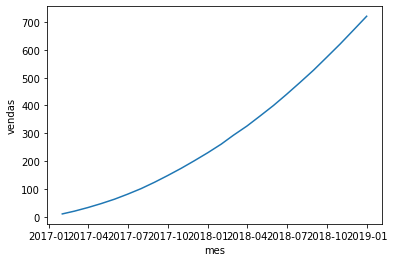

In [30]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

---

## <font color = blackpink>Aperfeiçoando o gráfico

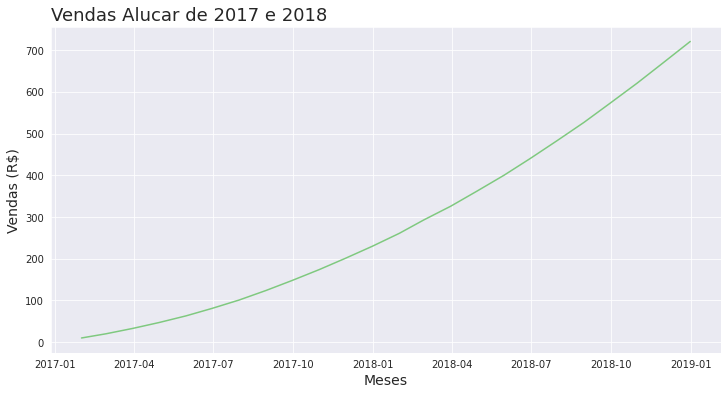

In [46]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

---
---

# <font color = green>Aula 2 – Decomposição e Autocorrelação

## <font color = blackpink>Decompondo As Vendas

In [47]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [49]:
alucar['aumento'] = alucar.vendas.diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


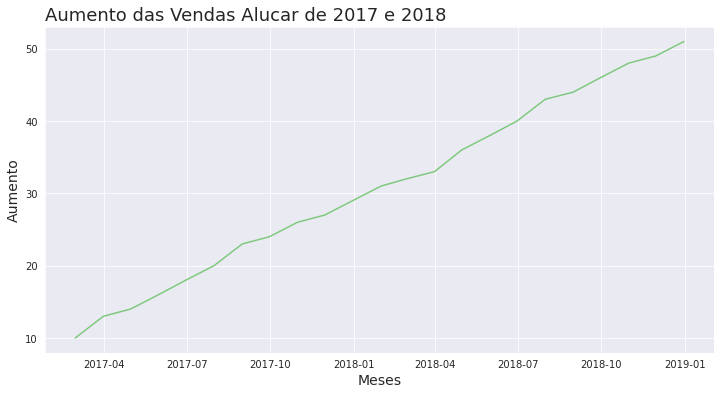

In [51]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [55]:
def plotar(titulo: str, labelx: str, labely: str, x: str, y: str, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

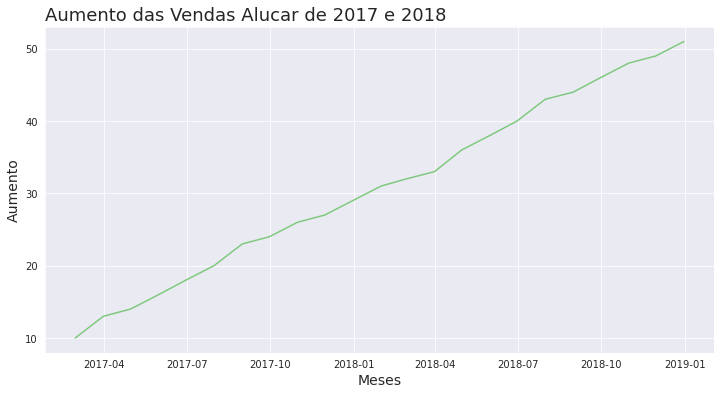

In [53]:
plotar('Aumento das Vendas Alucar de 2017 e 2018', 'Meses', 'Aumento', 'mes', 'aumento', alucar,)

In [56]:
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


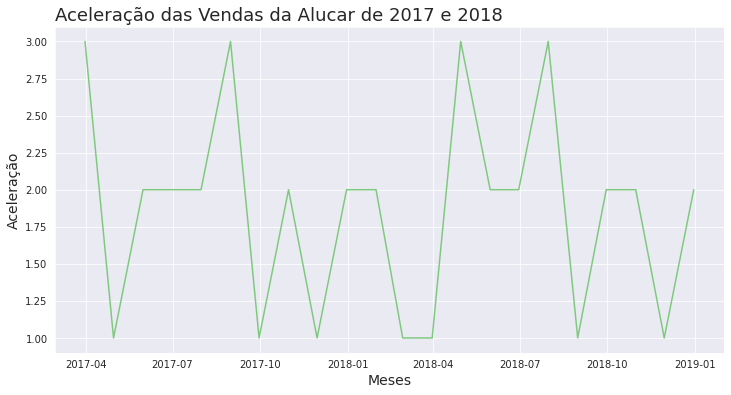

In [57]:
plotar('Aceleração das Vendas da Alucar de 2017 e 2018', 'Meses', 'Aceleração',
       'mes', 'aceleracao', alucar)

---

## <font color = blackpink>Observação e tendência

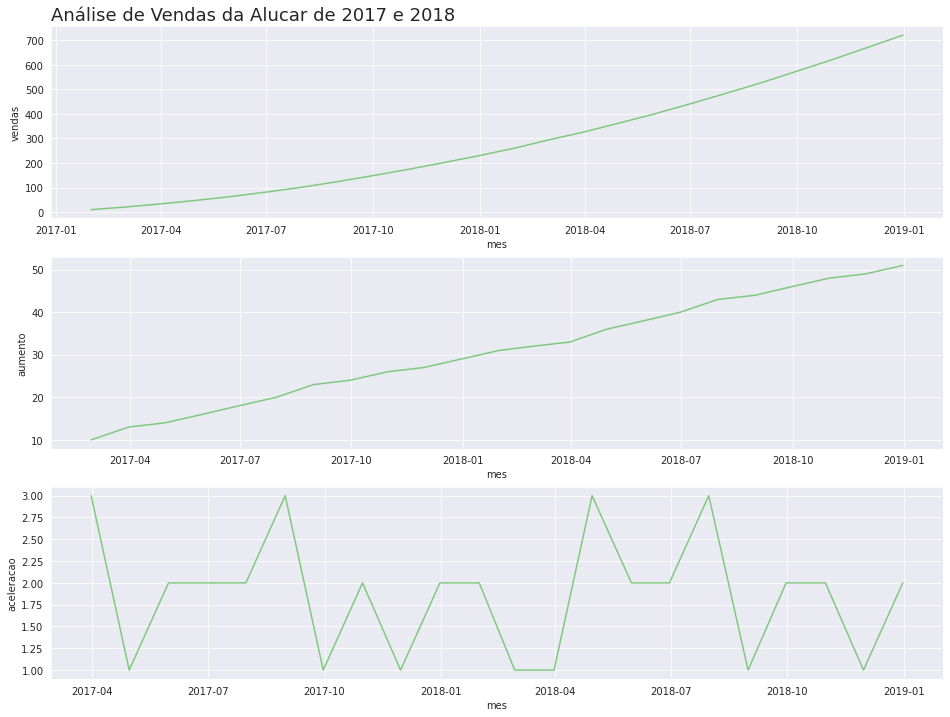

In [60]:
plt.figure(figsize = (16, 12))      # Seta o tamanho da imagem
ax = plt.subplot(3, 1, 1)     # Atribui o subplot a ax e seta a loc do primeiro gráfico
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018',
             fontsize = 18, loc = 'left')   # Seta título, fonte e localização
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)  # Primeiro Gráfico
plt.subplot(3, 1, 2)      # Localização do segundo gráfico, divide em 3 partes, diz que ocupa a parte toda, diz qual é a parte em que plotará
sns.lineplot(x = 'mes', y = 'aumento', data = alucar) # Segundo Gráfico
plt.subplot(3, 1, 3)                # Localização do terceiro gráfico
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)  # Terceiro gráfico
ax = ax

In [61]:
def plot_comparacao(x: str, y1: str, y2: str, y3: str, dataset, titulo: str):
  plt.figure(figsize = (16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  ax = ax

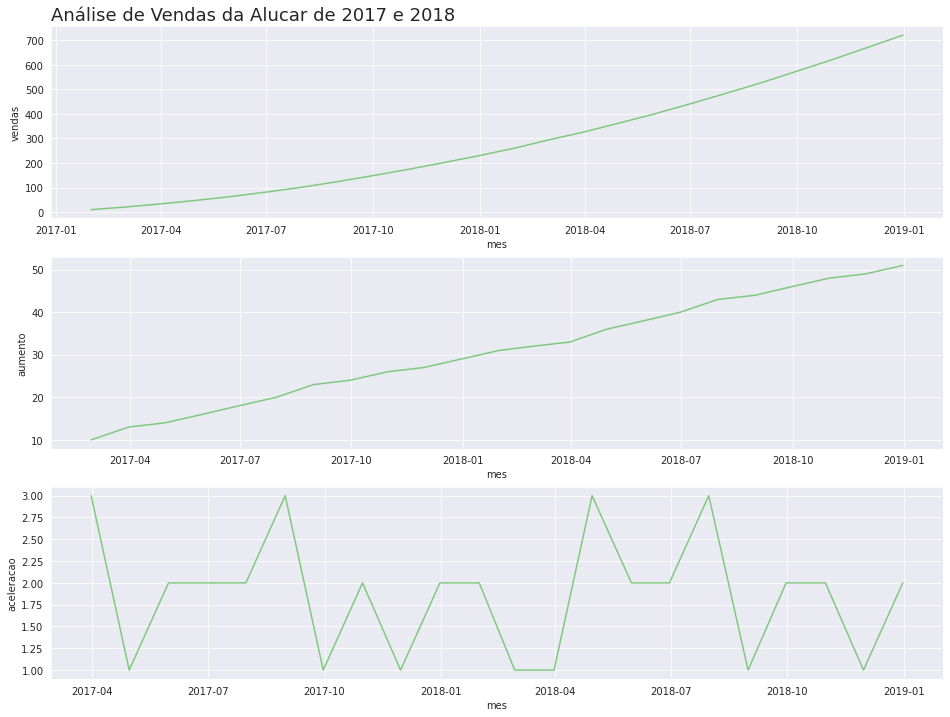

In [62]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de Vendas da Alucar de 2017 e 2018')

---

## <font color = blackpink>Autocorrelação

In [64]:
from pandas.plotting import autocorrelation_plot

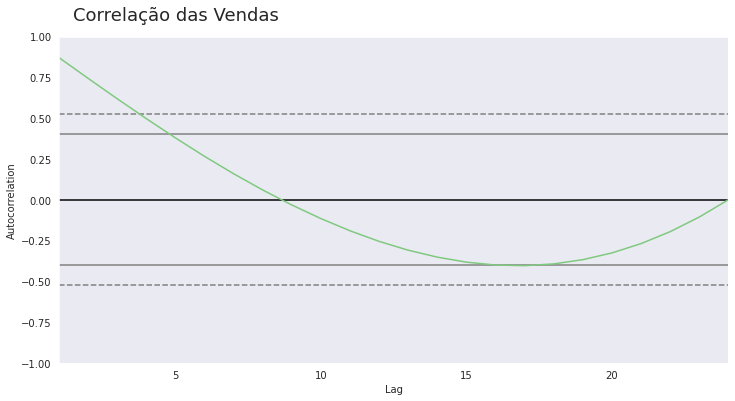

In [72]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.vendas)
ax = ax

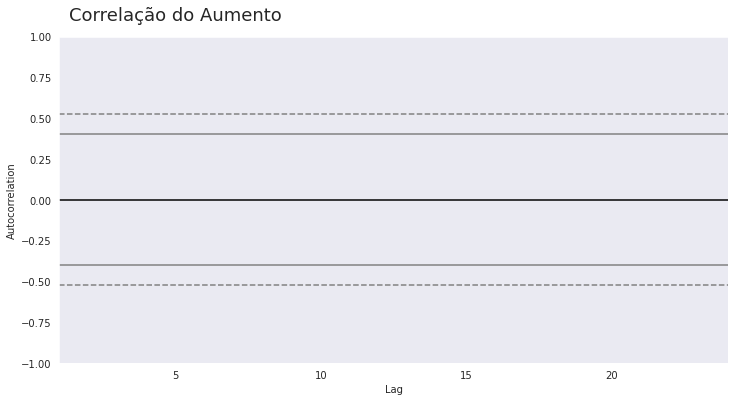

In [73]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.aumento)
ax = ax

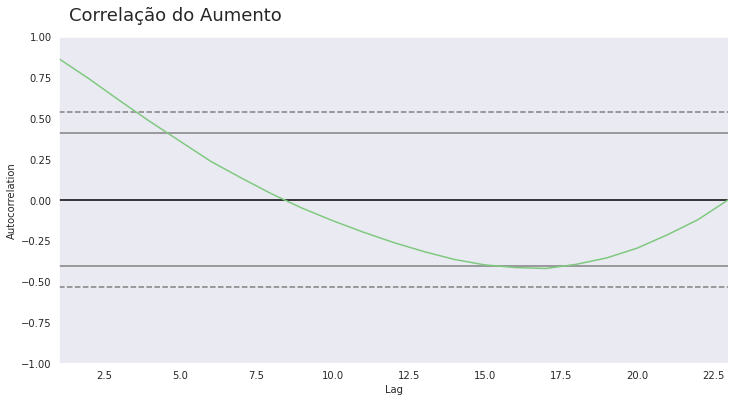

In [74]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.aumento[1:])
ax = ax

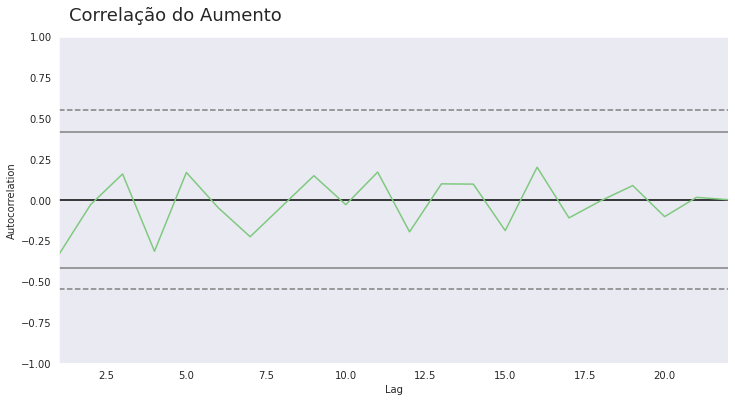

In [75]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar.aceleracao[2:])
ax = ax